### **Final Project: Predicting results of a Marketing Campaign**

**Name:** Kiran Parapurath

**Organization:** Entri Elevate

**Date:** 19.04.2025

### **Overview of Problem Statement**

Analyzing data from a Marketing Campaign of a bank to understand and predict whether the client subscribed to a term deposit or not and comparing the related features to understand the dependency of the client's job. This might help to predict what job categories are more likely to start a deposit and target them more for future campaigns to yield better results. The dependency on others features may also be analysed to better understand correlation.

### **Objective**

Predict whether a Term Deposit was subscribed by the client during marketing campaign, based on their job category to determine what kind of customers should be targeted for future campaigns.

### **Data Description**

**Source of Data:** https://archive.ics.uci.edu/dataset/222/bank+marketing

Data description:
The data under consideration was obtained from UCI Machine Learning Repository. In addition here is a short description of the features of the dataset:
Variables:

Input variables:


   **Bank client data:**

   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")


   **Related with the last contact of the current campaign:**

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)


  **Other attributes:**

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### **Data Collection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
!pip install category_encoders
from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


Importing libraries that I am using throughout this project.

In [2]:
df = pd.read_excel('Banking-Marketing-calls.xlsx')
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
display(df.tail())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Importing and displaying the data as well as the first and last five rows to get a general understanding of the data structure and distribution.

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

Numerical and Categorical Features can be distinguished on the basis of info() function.

In [ ]:
display(df.describe())

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
display(df.mode())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


Mean, Median(50% value) and mode are displayed. From this the understanding regarding skewness of numerical features, I can see that age would be slightly right skewed (mean>median), balance is definitely right skewed, day might be slightly left skewed (Mean<Median), duration is right skewed as well as campaign, pdays and previous.

In [ ]:
display(df[['job', 'y']])

,job,y
0,management,no
1,technician,no
2,entrepreneur,no
3,blue-collar,no
4,unknown,no
...,...,...
45206,technician,yes
45207,retired,yes
45208,retired,yes
45209,blue-collar,no


y being the target feature, I wanted an overview of it with respect to the job feature.

### **Data Preprocessing - Data Cleaning**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Dataset has no missing values.

In [4]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
skewness = df[numerical_features].skew()
print("\nSkewness of numerical features:\n", skewness)


Skewness of numerical features:
 age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In simpler terms, it tells you if the data is leaning more towards one side or is evenly distributed. The code selects numerical features in df and adds their names to a Python list called numerical_features. Then the skewness of the features in the list is calculated using skew() function. Only skewness value of 'day' feature is acceptable. (within the range of -0.5 and +0.5).

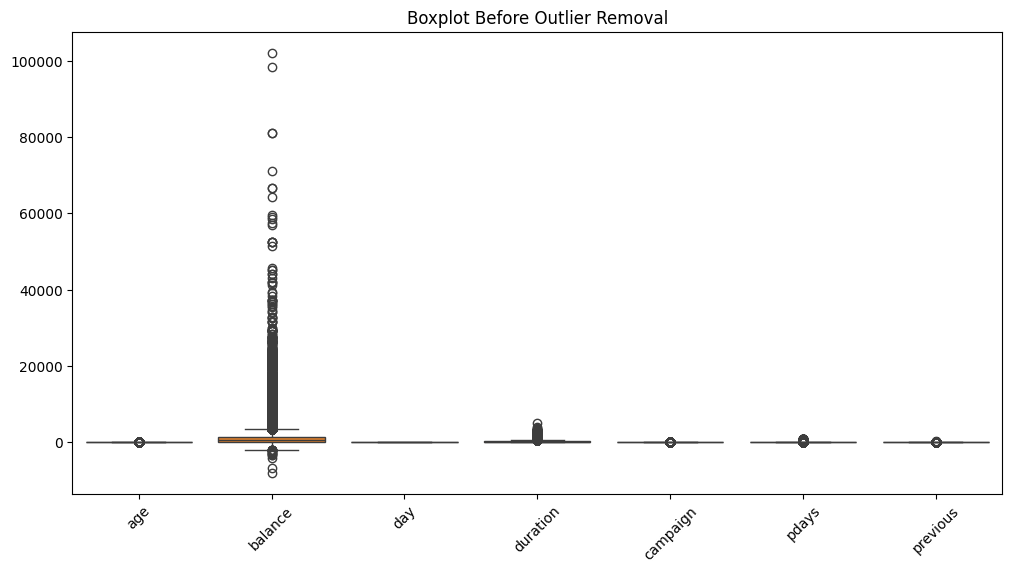

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot Before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

The primary purpose of this box plot is to help identify outliers in the data before proceeding with data cleaning or modeling. Outliers are data points that are significantly different from the rest of the data and can negatively impact the results of statistical analysis and machine learning models. By visually inspecting the box plot, outliers can be easily spotted as points that lie far outside the "whiskers" of the boxes. After visulaizing and dealing with the outliers (removal), skewness can be dealt with.

In [6]:
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data
df_no_outliers = remove_outliers_iqr(df.copy(), numerical_features)

This code aims to identify and remove outliers from the numerical features within the dataset using the Interquartile Range (IQR) method. Firstly, numerical features are selected and added to a list.
def remove_outliers_iqr(data, features): This defines a function named remove_outliers_iqr that takes the DataFrame (data) and a list of features (features) as input.
Inside the function, it iterates through each feature in the features list.
Q1 = data[feature].quantile(0.25): Calculates the first quartile (25th percentile) of the feature.
Q3 = data[feature].quantile(0.75): Calculates the third quartile (75th percentile) of the feature.
IQR = Q3 - Q1: Calculates the Interquartile Range.
lower_bound = Q1 - 1.5 * IQR: Calculates the lower bound for outlier detection.
upper_bound = Q3 + 1.5 * IQR: Calculates the upper bound for outlier detection.
data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]: Filters the DataFrame, keeping only the rows where the feature values are within the lower and upper bounds.
return data: Returns the modified DataFrame with outliers removed.
df_no_outliers = remove_outliers_iqr(df.copy(), numerical_features): Applies the remove_outliers_iqr function to a copy of the original DataFrame (df) and the numerical_features list, storing the result in df_no_outliers.

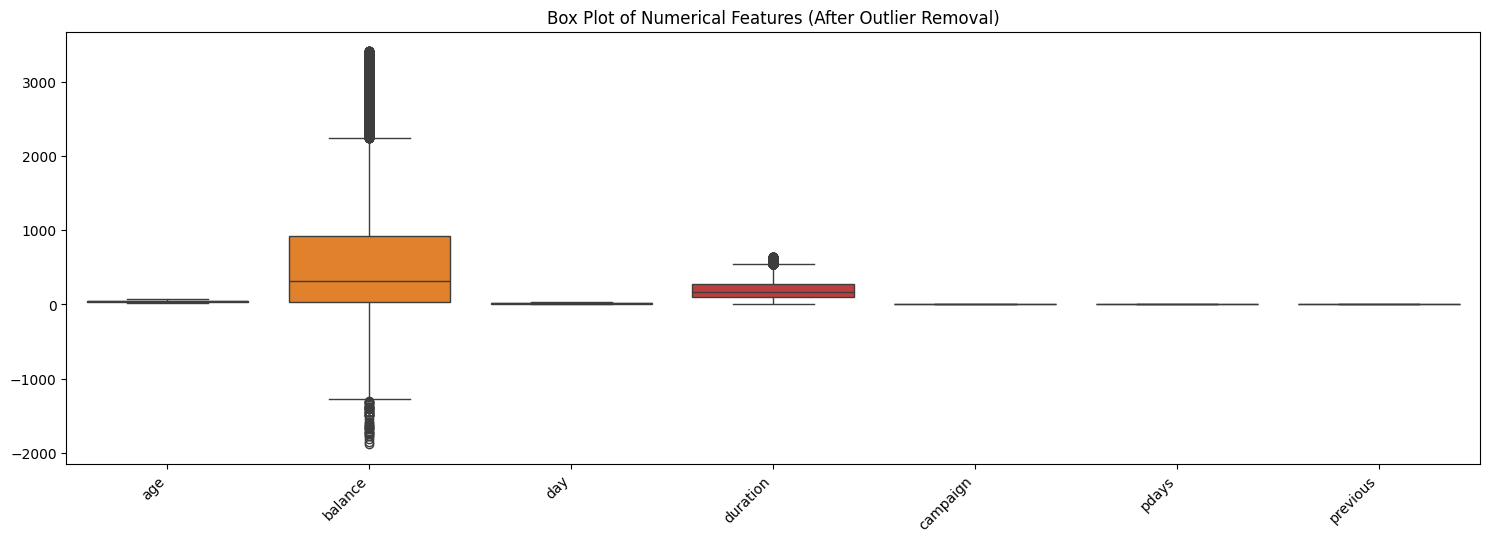

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)
sns.boxplot(data=df_no_outliers[numerical_features])
plt.title('Box Plot of Numerical Features (After Outlier Removal)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The matplotlib.pyplot and seaborn libraries are used to create a box plot of the numerical features after outlier removal. This visualization helps to confirm whether the outliers have been effectively removed.

In [8]:
def transform_until_skewness_in_range(data, features):
    for feature in features:
        while abs(data[feature].skew()) > 0.5:
            if data[feature].skew() > 0.5:
                data[feature] = np.sqrt(data[feature])
            else:
                data[feature] = np.cbrt(data[feature])
    return data
df_transformed = transform_until_skewness_in_range(df_no_outliers.copy(), numerical_features)
skewness_after_transform = df_transformed[numerical_features].skew()
print("\nSkewness of numerical features after transformation:\n", skewness_after_transform)


Skewness of numerical features after transformation:
 age         0.384961
balance     0.438405
day         0.108141
duration    0.294494
campaign    0.428751
pdays       0.000000
previous    0.000000
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Addressing skewness: This function aims to reduce the skewness of numerical features until they fall within an acceptable range.
I used Square root tranformation to deal with features whose skewness is greater than 0.5 and cube root transformation for other skewness values.
It iterates through each feature in the provided list of features.
It checks if the absolute skewness of the feature is greater than 0.5.
If the skewness is positive (greater than 0.5), it applies a square root transformation (np.sqrt) to the feature's values. This helps to reduce right skewness.
If the skewness is negative (less than -0.5), it applies a cube root transformation (np.cbrt) to the feature's values. This helps to reduce left skewness.
It continues this process until the skewness of the feature is within the acceptable range (absolute value less than or equal to 0.5).
Finally, it returns the modified data.
df_transformed = ...: This line applies the transform_until_skewness_in_range function to a copy of the DataFrame (df_no_outliers) and the list of numerical features (numerical_features). The transformed data is stored in a new DataFrame called df_transformed.
skewness_after_transform = ...: This line calculates the skewness of the transformed numerical features using the .skew() method and stores it in skewness_after_transform.
print(...): This line prints the skewness values of the transformed features to the console, allowing the user to see the effect of the transformation.
In essence, this code aims to improve the data quality by reducing skewness in the numerical features, which can be beneficial for building more accurate machine learning models.
Clearly, it has helped address the skewness problem as the new values suggest and also visually represented below.

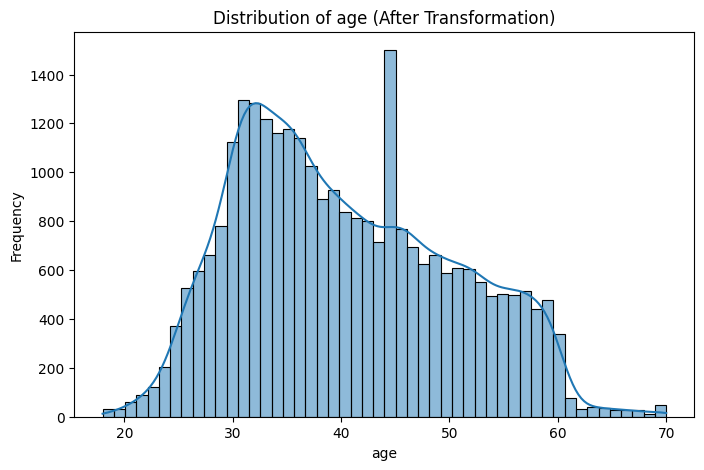

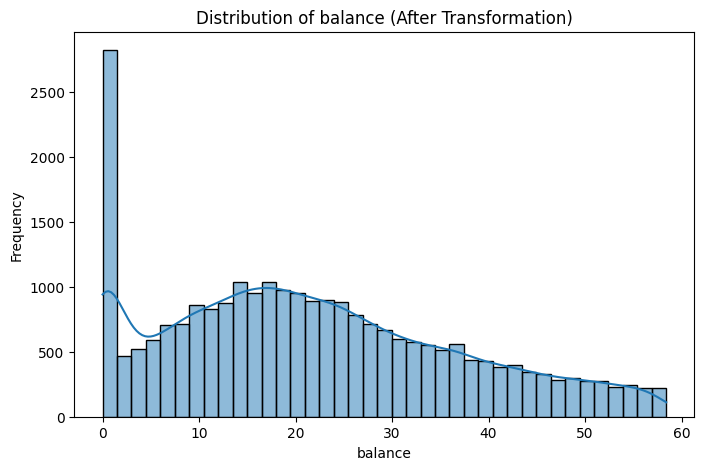

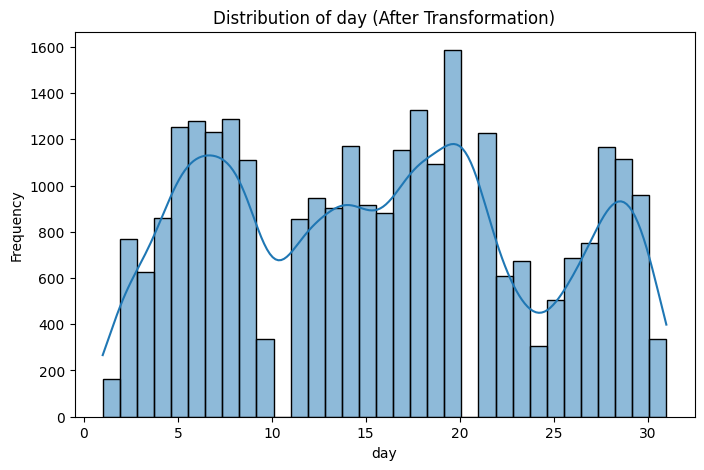

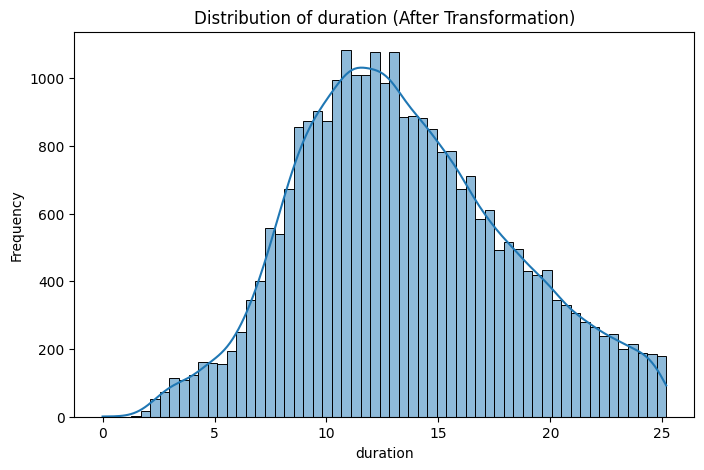

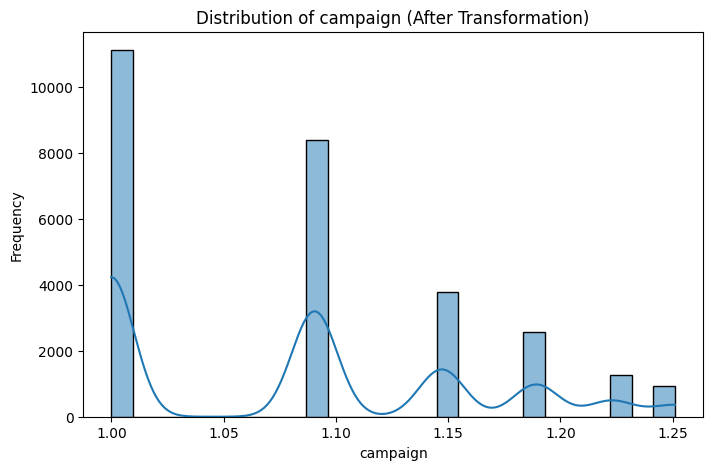

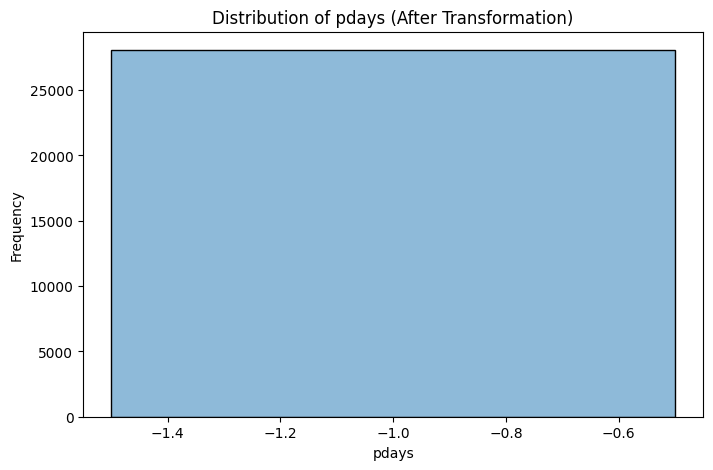

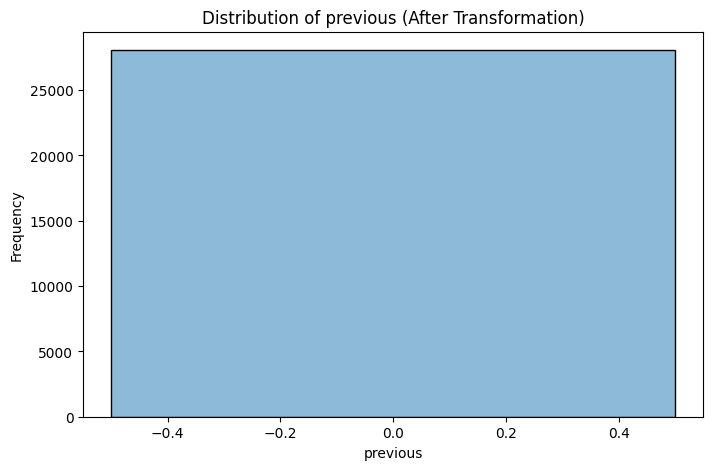

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_transformed[feature], kde=True)
    plt.title(f'Distribution of {feature} (After Transformation)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

This code is designed to visualize the distribution of each numerical feature after the transformation has been applied to it. The purpose of the transformation, applied earlier in the code, was to reduce skewness and improve data quality. Now, this visualization helps confirm that the skewness of numerical features after applying square root transformation has been brought to acceptable levels.

for feature in numerical_features: : This line starts a loop that iterates through each feature present in the numerical_features list. Remember, this list was created earlier and contains the names of all the numerical columns in the dataset.
plt.figure(figsize=(8, 5)): For each feature, this line creates a new figure (a plot) with a specific size (8 inches wide, 5 inches tall). This ensures each feature's distribution gets its own plot.
sns.histplot(df_transformed[feature], kde=True): This is the core of the visualization.
sns.histplot is a function from the seaborn library used to create histograms.
df_transformed[feature] selects the data for the current feature from the transformed DataFrame (df_transformed).
kde=True adds a Kernel Density Estimation curve to the histogram, providing a smoother representation of the data's distribution.
plt.title(f'Distribution of {feature} (After Transformation)'): This line sets the title of the plot, clearly indicating which feature's distribution is being displayed.
plt.xlabel(feature): This line labels the x-axis with the name of the feature.
plt.ylabel('Frequency'): This line labels the y-axis as 'Frequency', representing the count of data points within each bin of the histogram.
plt.show(): This line displays the created plot.

### **Exploratory Data Analysis (EDA)**

In [9]:
print(df_transformed.nunique())

age            53
job            12
marital         3
education       4
default         2
balance      3125
housing         2
loan            2
contact         3
day            31
month          12
duration      634
campaign        6
pdays           1
previous        1
poutcome        1
y               2
dtype: int64


An overview of the number of unique values in each Column before checking correlations. It helps foresee whether any columns have too many same values and that might result in unrepresentative heatmap. Such rows maybe removed.

In [10]:
df_transformed = df_transformed.drop(['pdays', 'previous'], axis=1)
numerical_features = df_transformed.select_dtypes(include=np.number).columns.tolist()

Since columns pdays and previous have only one unique value, they maybe dropped as their correlation to other numerical features are not so relevant.

Code Snippets:
drop() method: The drop() method in pandas is used to remove specified rows or columns from a DataFrame.
['pdays', 'previous']: This list specifies the names of the columns you want to drop.
axis=1: This argument indicates that you want to drop columns (axis=1 refers to columns; axis=0 refers to rows).

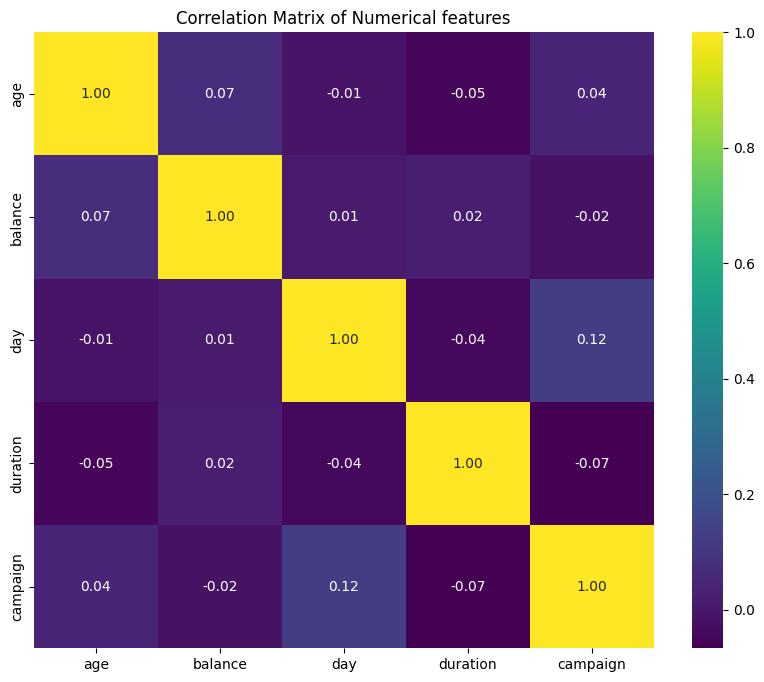

In [11]:
correlation = df_transformed[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical features')
plt.show()

Heatmap shows little correlation between numerical features. A strong correlation is also seen between the Age and Balance features as well as the day and Campaign features seems to have a bit of relationship.
So in totality, here we are calculating the correlation between selected numerical features in the dataset. Then, visually represent the correlation using a heatmap, which helps in understanding the relationships between the features more easily. A strong positive correlation is indicated by a brighter color (closer to yellow in the 'viridis' colormap), while a strong negative correlation is indicated by a darker color (closer to purple). Values close to 0 indicate a weak correlation.

Code Snippets:
correlation: The correlation matrix calculated in the previous step is passed as input.
annot=True: This displays the correlation values on the heatmap itself, making it easier to interpret.
cmap='viridis': This sets the color map for the heatmap. 'viridis' is a color scheme that ranges from purple to yellow.
fmt=".2f": This formats the correlation values to

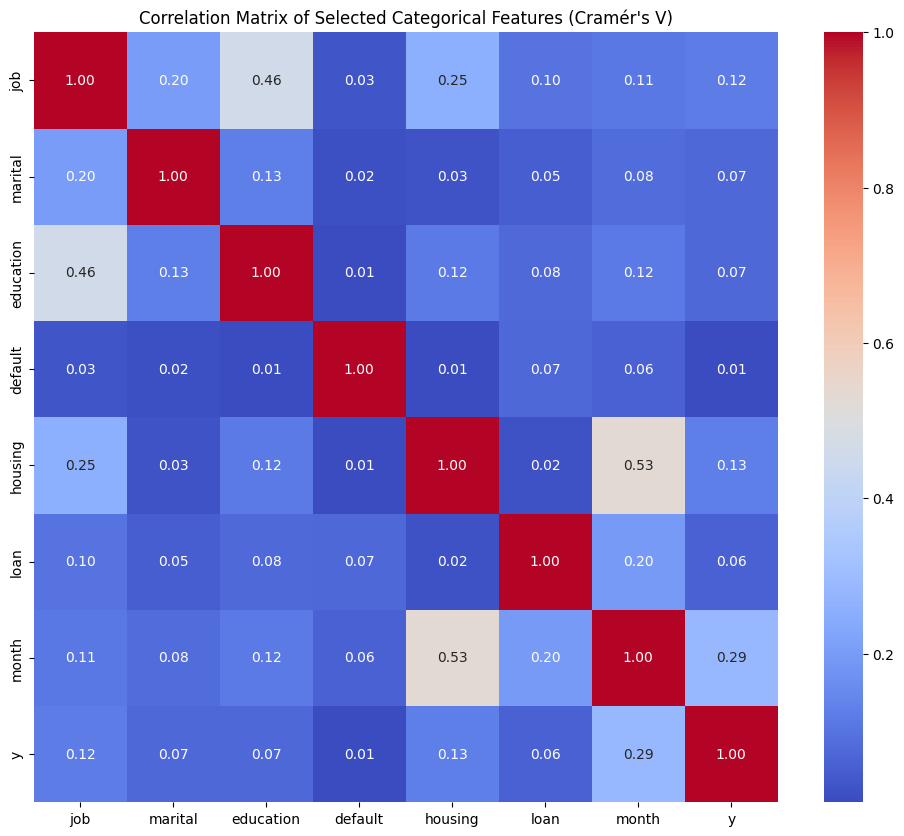

In [12]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
correlation_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in categorical_features:
    for j in categorical_features:
        correlation_matrix.loc[i, j] = cramers_v(df_transformed[i], df_transformed[j])
correlation_matrix = correlation_matrix.astype(float)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Categorical Features (Cramér's V)")
plt.show()

Among the categorical features, the outcome 'y' i.e. whether or not the client on the phone subscribes to a term deposit during a phone campaign, has clearly the highest correlation with job, housing loan (whether or not the client has one) and the month of last contact. My assumption would be that the month, job and housing loan would have the highest effect on the decision of the client to subscribe to a deposit or not.

Code snippets:
The code aims to find and visualize the correlation between categorical features in the dataset. Since traditional correlation methods like Pearson's correlation are not suitable for categorical data, it uses Cramér's V, a measure of association between two categorical variables.
This defines a function cramers_v that takes two categorical variables (x and y) as input and calculates Cramér's V.
It uses a contingency table (created using pd.crosstab) and the chi-squared test (chi2_contingency) to determine the association.
The formula for Cramér's V is then applied to get a value between 0 and 1, where 0 indicates no association and 1 indicates a perfect association.
This code creates an empty DataFrame called correlation_matrix to store the Cramér's V values.
It then iterates through each pair of categorical features in the categorical_features list and calculates Cramér's V using the cramers_v function.
The calculated Cramér's V value is stored in the correlation_matrix at the corresponding row and column.
Finally, the data type of the correlation_matrix is converted to float.

### **Feature Engineering/Selection**

I would firstly draw a countplot to determine whether there are too many unique values in certain columns. In that case, it would be better to perform Target encoding.

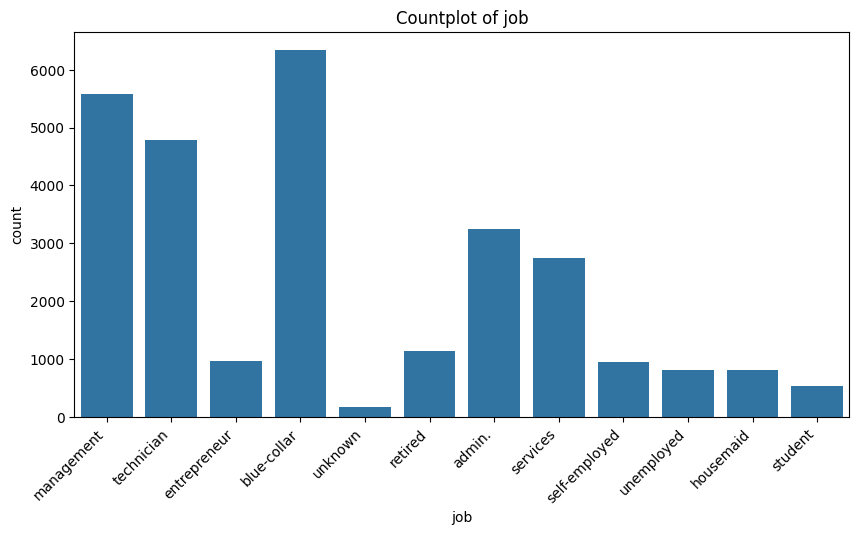

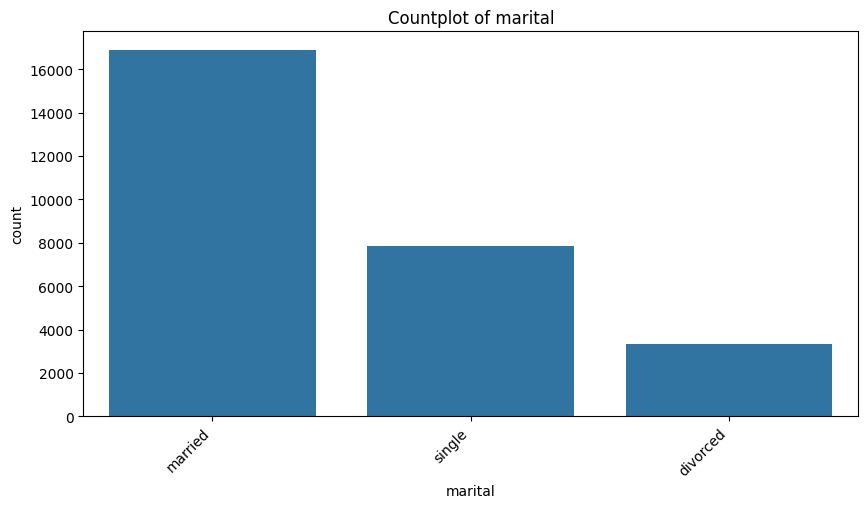

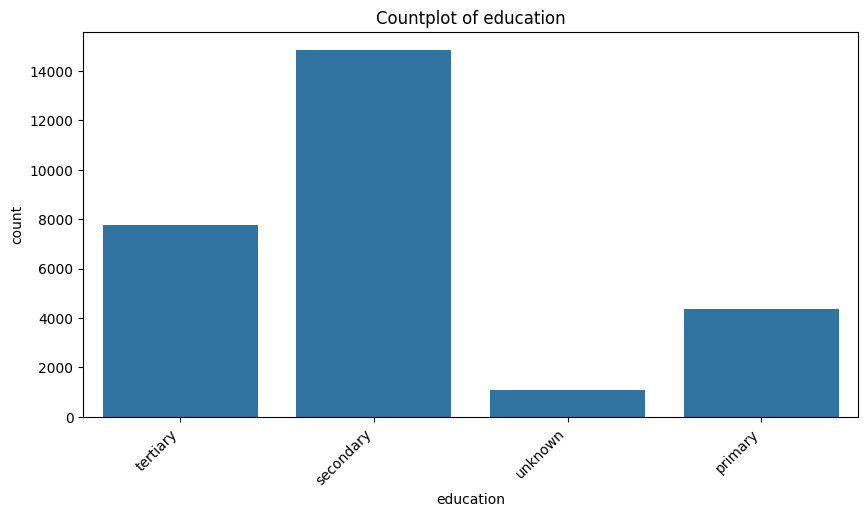

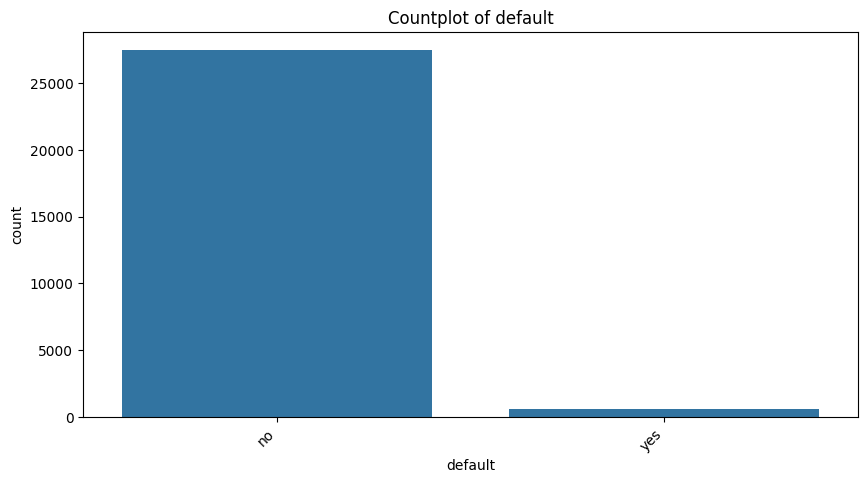

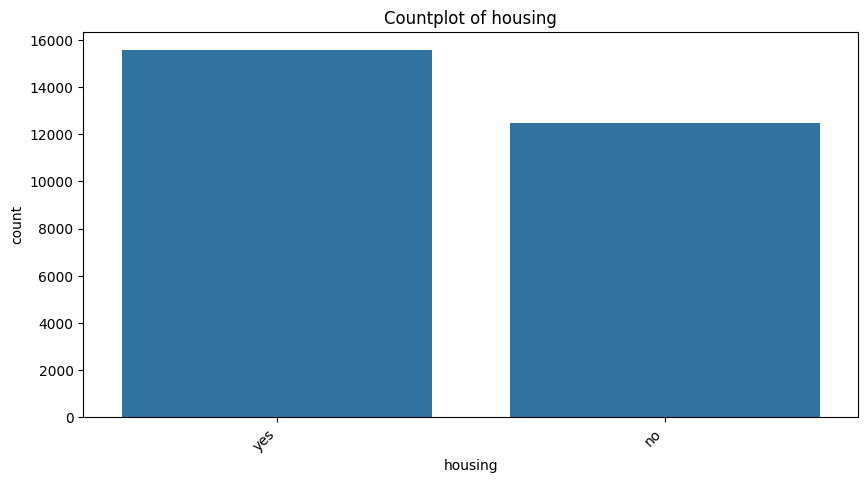

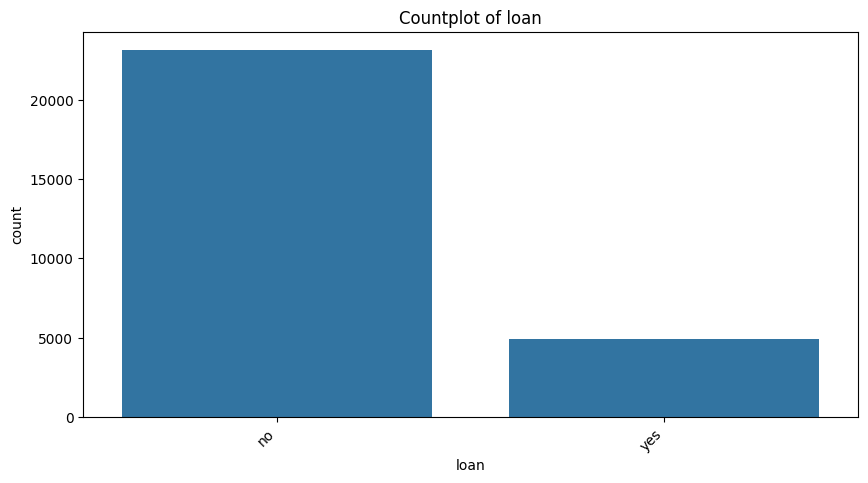

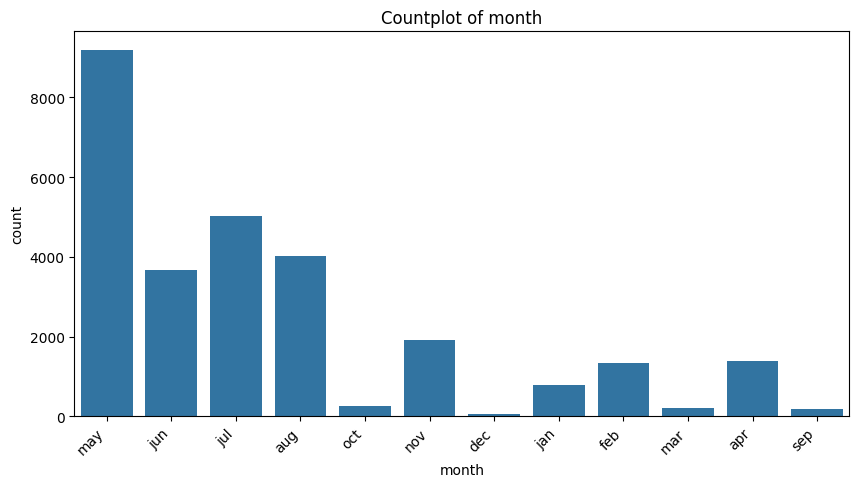

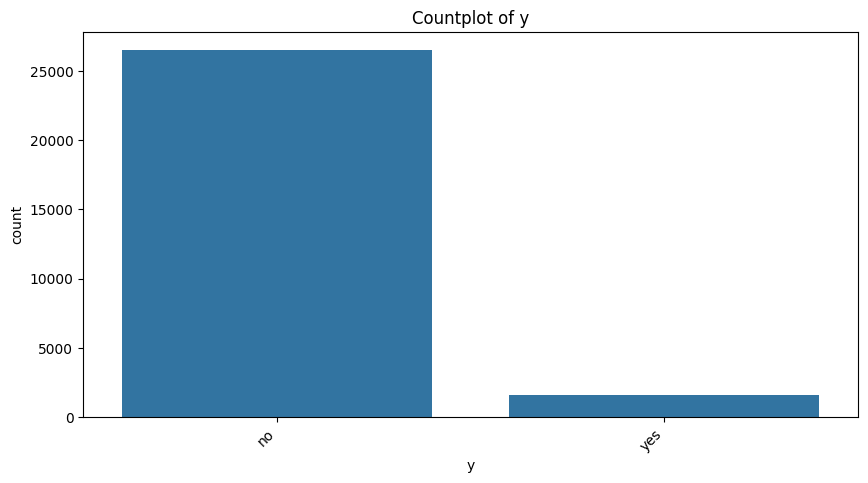

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df_transformed)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

After drawing the heatmap earlier, I had already come to the conclusion that job, housing loan and month had the highest correlation to the customer on the campaign subcribing to the Term Deposit or not. From the above count plot I observe that the job and month columns have too many unique values in comaprison to the rest of the categorical features. So I will apply target encoding.

In [13]:
X = df_transformed[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']]
y = df_transformed['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
def target_encode(train_data, test_data, feature, target, y_train):
    y_train_numeric = y_train.map({'yes': 1, 'no': 0})
    encoding = train_data.merge(y_train_numeric, left_index=True, right_index=True).groupby(feature)[target].mean()
    train_data[feature] = train_data[feature].map(encoding)
    test_data[feature] = test_data[feature].map(encoding)
    return train_data, test_data
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for feature in categorical_features:
    X_train_encoded, X_test_encoded = target_encode(X_train_encoded.copy(), X_test_encoded.copy(), feature, 'y', y_train)

Firstly, I apply Target encoding on the categorical features as mentioned. It involves selecting the relevant features, splitting the data into training and testing sets, and then applying target encoding to the categorical features. I am stratifying when I am splitting the data ensuring that the class proportions are preserved.

Going through the code:
X: This variable is assigned a subset of the df_transformed DataFrame, containing the columns: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', and 'month'. These are the features that the model will use to make predictions.
y: This variable is assigned the 'y' column from df_transformed. This column represents the target variable, which is what the model is trying to predict (in this case, whether a client subscribed to a term deposit or not).
The train_test_split function to divide the data into training and testing sets.
X_train, y_train: These variables will hold the features and target variable for the training set, which the model will learn from.
stratify=y: This argument tells train_test_split to stratify the split based on the target variable (y), ensuring that the class proportions are preserved.
X_test, y_test: These variables will hold the features and target variable for the testing set, which will be used to evaluate the model's performance on unseen data.
test_size=0.2: This parameter indicates that 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training.
random_state=42: This ensures that the data is split in a reproducible way, allowing for consistent results across different runs of the code.
target_encode function: This function applies target encoding to a specific categorical feature. It replaces the categorical values with the average of the target variable for that category in the training data. This helps to convert categorical data into a numerical format that machine learning models can understand.
Applying target encoding: The code iterates through each feature in the categorical_features list and applies the target_encode function to both the training and testing sets. This transforms the categorical features into numerical representations using target encoding.

In [14]:
def target_encode(train_data, test_data, feature, target, y_train):
    y_train_numeric = y_train.map({'yes': 1, 'no': 0})
    encoding = train_data.merge(y_train_numeric, left_index=True, right_index=True).groupby(feature)[target].mean()
    train_data[feature] = train_data[feature].map(encoding)
    test_data[feature] = test_data[feature].map(encoding)
    return train_data, test_data
for feature in categorical_features:
    X_train, X_test = target_encode(X_train.copy(), X_test.copy(), feature, 'y', y_train)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(8))

     Feature  Importance
7      month    0.462819
0        job    0.243027
2  education    0.079329
6    contact    0.075632
4    housing    0.054442
1    marital    0.053550
5       loan    0.023252
3    default    0.007950


Here, I am checking the importance of each feature and displaying them in ascending order. From my analysis, it is clear that 'month' and 'job' features have the most importance and relevance with regards to my target feature 'y'. So I will build a Machine Learning model according to the aim that was aforementioned in the beginning of the Project. But before building the model it is important to check for imbalances in the selected feature.

Code insights:
Convert Target to Numeric: The line y_train_numeric = y_train.map({'yes': 1, 'no': 0}) converts the y_train variable (which likely contains "yes" or "no" values) into numerical values (1 for "yes" and 0 for "no"). This makes it suitable for calculations.
Calculate Encodings:
train_data.merge(y_train_numeric, left_index=True, right_index=True) combines the training data with the numeric target variable.
groupby(feature)[target].mean() calculates the average of the target variable (target, which is 'y' in this case) for each unique value of the categorical feature (feature). This average becomes the encoding for that category.
Apply Encodings:
train_data[feature] = train_data[feature].map(encoding) replaces the original categorical values in the training data with their corresponding encodings.
test_data[feature] = test_data[feature].map(encoding) does the same for the testing data, ensuring consistent encoding.
Return Encoded Data: The function returns the modified train_data and test_data with the target-encoded features.
The for loop iterates through each categorical feature in the list categorical_features and applies the target_encode function to transform both the training data (X_train) and the testing data (X_test).
Random Forest Classifier is used to determine the importance of each feature in predicting the target variable.
Create and Train the Model:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) creates a Random Forest Classifier with 100 decision trees (n_estimators) and a random seed for reproducibility (random_state).
rf_classifier.fit(X_train, y_train) trains the model using the target-encoded training data (X_train) and the corresponding target values (y_train).
Get Feature Importances:
feature_importances = rf_classifier.feature_importances_ extracts the importance of each feature from the trained model.
Create DataFrame for Visualization:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}) creates a DataFrame to store the features and their importances.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) sorts the DataFrame in descending order of importance.
Print Top Features:
print(feature_importance_df.head(8)) prints the top 8 features with the highest importances, helping you identify the most influential features for predicting the target variable.

In [15]:
selected_features = ['job','month']
for feature in selected_features:
    frequency = df_transformed[feature].value_counts(normalize=True)
    print(f"\nFrequency distribution for {feature}:\n{frequency}")
    most_frequent_category_ratio = frequency.max()
    imbalance_ratio = most_frequent_category_ratio / frequency.min()
    print(f"Imbalance ratio for {feature}: {imbalance_ratio:.2f}")


Frequency distribution for job:
job
blue-collar      0.225729
management       0.198582
technician       0.170295
admin.           0.115857
services         0.097510
retired          0.040472
entrepreneur     0.034273
self-employed    0.033916
unemployed       0.029142
housemaid        0.029107
student          0.018918
unknown          0.006199
Name: proportion, dtype: float64
Imbalance ratio for job: 36.41

Frequency distribution for month:
month
may    0.327728
jul    0.178952
aug    0.143575
jun    0.130785
nov    0.068296
apr    0.049307
feb    0.047704
jan    0.027682
oct    0.009405
mar    0.007588
sep    0.006520
dec    0.002458
Name: proportion, dtype: float64
Imbalance ratio for month: 133.32


Imbalance ratio of my selected feature indicate a high imbalance which could potentially lead to biased models or difficulties in predicting minority classes. But I wont apply any Sampling technique as I have already performed stratification and I belive this would be enough.

Going through the code:
for loop iterates through each feature in the selected_features list, allowing the code within the loop to be executed for both 'job' and 'month'.
frequency: This line calculates the frequency distribution of each category within the current feature using value_counts(normalize=True).
df_transformed[feature]: This selects the column corresponding to the current feature from the DataFrame df_transformed.
value_counts(): This function counts the occurrences of each unique value in the column.
normalize=True: This argument converts the counts into proportions (frequencies) by dividing them by the total number of data points.
print(): The frequency distribution is then printed to the console.
most_frequent_category_ratio: This line finds the frequency of the most common category within the feature.
imbalance_ratio: This crucial line calculates the imbalance ratio by dividing the frequency of the most frequent category by the frequency of the least frequent category. This gives a measure of how much more prevalent one category is compared to another.
print(): Finally, the imbalance ratio is printed to the console, formatted to two decimal places.

### **Data Splitting followed by building ML model(Random Forest)**

In the case of my dataset, since I am working with categorical features and aiming for interpretability, I assume the best classification algorithms for me would be Random forest, Logistic regression and Decision tree because of these repsective models' simplicity, accuracy and robustness.

In [18]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

I am building a Machine Learning model based on Random Forest Classifier and evaluating the performance of the said model.

Code breakdown:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier: This is a variable that will store the Random Forest model object. Think of it like a container holding all the logic for the model.
RandomForestClassifier(): This is a function from the sklearn.ensemble module in Python that creates a Random Forest Classifier model.
n_estimators=100: This parameter specifies that the model should be built using 100 decision trees. More trees generally lead to a more robust model, but can increase computation time. class_weight='balanced' is still used to adjust the model's training to account for the remaining class imbalance.
random_state=42: This sets a random seed for reproducibility. By using the same seed, you ensure that the model is built in the same way each time the code is run, making the results consistent.

rf_classifier.fit(X_train_resampled, y_train_resampled)

fit(): This is a method that is called on the rf_classifier object to train the Random Forest model.
X_train_resampled: This variable contains the training data features. It's the input data the model will learn from. It resampled to address class imbalance.
y_train_resampled: This variable contains the target variable (whether the customer subscribed to a term deposit) for the training data. This is what the model is trying to predict. It was resampled to address class imbalance.

 y_pred_rf = rf_classifier.predict(X_test)

predict(): This method is used to make predictions on new data using the trained model.
X_test: This variable contains the features for the test data, which the model has not seen before.
y_pred_rf: This variable will store the model's predictions for the target variable (term deposit subscription) on the test data. These predictions are used to evaluate the model's performance.

### **Model Evaluation**

In [19]:
accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8646241539009619
Classification Report:
              precision    recall  f1-score   support

          no       0.96      0.89      0.93      5301
         yes       0.18      0.41      0.25       313

    accuracy                           0.86      5614
   macro avg       0.57      0.65      0.59      5614
weighted avg       0.92      0.86      0.89      5614



For the Random Forest model, I am getting an accuracy score of 0.87 approximately, indicating that the model correctly classified 87% of the instances in the dataset.

Coding details:
Here, I am evaluating the performance of the Random Forest model that was previously trained. Two common metrics are used for classification tasks: accuracy and a classification report.
accuracy_score: This is a function from the sklearn.metrics module, which is a library for evaluating machine learning models.
y_test: This variable holds the actual values of the target variable (whether the customer subscribed to a term deposit) for the test dataset. This is the ground truth that the model's predictions will be compared against.
y_pred_rf: This variable holds the predicted values of the target variable, generated by the Random Forest model (rf_classifier) on the test dataset.
accuracy: This variable stores the calculated accuracy score, which represents the proportion of correctly classified instances out of the total instances in the test dataset.
classification_report: This is another function from sklearn.metrics. It generates a more detailed report on the model's performance, including precision, recall, F1-score, and support for each class.
y_test, y_pred_rf: Same as above—the actual and predicted values.
classification_rep: This variable stores the generated classification report as a text string.
These lines simply print the calculated accuracy score and the classification report to the console so the user can see how the model performed.
f" ... {variable} ... " is a way to format strings in Python, inserting the value of the variable into the string.
\n in the second print statement is a newline character, ensuring the classification report is printed on a separate line for better readability.
The accuracy score is an overall measure of how often the model got it right. The classification_report gives more specific details about its performance on each class (e.g., how well it did at predicting "yes" vs. "no"). This information helps in understanding the model's strengths and weaknesses.

### **Data Splitting followed by building ML model(Logistic Regression)**

In [ ]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

Next, I am building a model based on Logistic Regression Algorithm, training it, and then using it to make predictions.

Coding part:

logreg_model: This is simply a variable name used to store the Logistic Regression model object. You can think of it like a container that holds all the information and logic for the model.
LogisticRegression(): This is a function from the sklearn.linear_model module in Python. It creates a Logistic Regression model object, which is a type of statistical model used for classification tasks (predicting categories).
random_state=42: This sets a random seed for reproducibility. By using the same seed, you ensure that the model is built in the same way each time the code is run, making the results consistent.
.fit(): This is a method that is called on the logreg_model object to train the Logistic Regression model. Training a model essentially means letting the model learn patterns from the data so it can make predictions.
X_train_resampled: This variable contains the training data features. It's the input data the model will learn from. It has likely been resampled to address class imbalance (making sure there are roughly equal numbers of examples from each category the model is trying to predict).
y_train_resampled: This variable contains the target variable (in this case, whether the customer subscribed to a term deposit or not) for the training data. It has likely been resampled to address class imbalance as well. This is what the model is trying to predict.
.predict(): This method is used to make predictions on new data using the trained model.
X_test: This variable contains the features for the test data, which the model has not seen before. It's like giving the model a quiz to see how well it learned from the training data.
y_pred_lr: This variable will store the model's predictions for the target variable (term deposit subscription) on the test data. These predictions are used to evaluate how well the model performs.

### **Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7158888493053082
Classification Report:
              precision    recall  f1-score   support

          no       0.97      0.72      0.83      5297
         yes       0.13      0.69      0.21       317

    accuracy                           0.72      5614
   macro avg       0.55      0.70      0.52      5614
weighted avg       0.93      0.72      0.79      5614



For this model, I am getting an accuracy score of 0.72 approximately, indicating that the model correctly classified 72% of the instances in the dataset.

Coding part:

accuracy_score: This is a function from the sklearn.metrics module, which is a library specifically designed for evaluating machine learning models.
y_test: This variable holds the actual values of the target variable (whether the customer subscribed to a term deposit or not) for the test dataset. This is the ground truth that we will compare the model's predictions against.
y_pred_lr: This variable holds the predicted values of the target variable, generated by the Logistic Regression model (logreg_model) on the test dataset.
accuracy: This variable stores the calculated accuracy score, which represents the proportion of correctly classified instances out of the total instances in the test dataset.
classification_report: This is another function from sklearn.metrics. It generates a more detailed report on the model's performance, including precision, recall, F1-score, and support for each class (in this case, 'yes' and 'no' for term deposit subscription).
y_test, y_pred_lr: Same as above—the actual and predicted values.
classification_rep: This variable stores the generated classification report as a text string.

### **Data Splitting followed by building ML model(Decision Tree Classifier)**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

An ML model is built using Decision Tree Classifier Algorithm.

Code insights:

Creating the Model:
dt_classifier = DecisionTreeClassifier(random_state=42): This line creates a Decision Tree Classifier object and assigns it to the variable dt_classifier.
DecisionTreeClassifier(): This is a function from the sklearn.tree module, which is used for creating decision tree models for classification tasks.
random_state=42: This sets a random seed for reproducibility. By using the same seed, you ensure that the model is built in the same way each time the code is run, making the results consistent.
Training the Model:
dt_classifier.fit(X_train_resampled, y_train_resampled): This line trains the decision tree model using the training data.
fit(): This is a method that is called on the dt_classifier object to train the model.
X_train_resampled: This variable contains the training data features. It's the input data the model will learn from. It was likely resampled to address class imbalance (making sure there are roughly equal numbers of examples from each category the model is trying to predict).
y_train_resampled: This variable contains the target variable (whether the customer subscribed to a term deposit) for the training data. It was likely resampled to address class imbalance as well. This is what the model is trying to predict.
Making Predictions:
y_pred_dt = dt_classifier.predict(X_test): This line uses the trained model to make predictions on the test data.
predict(): This method is used to make predictions on new data using the trained model.
X_test: This variable contains the features for the test data, which the model has not seen before. It's like giving the model a quiz to see how well it learned from the training data.
y_pred_dt: This variable will store the model's predictions for the target variable (term deposit subscription) on the test data. These predictions are used to evaluate how well the model performs.

### **Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred_dt)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8012112575703598
Classification Report:
              precision    recall  f1-score   support

          no       0.96      0.82      0.89      5297
         yes       0.14      0.47      0.21       317

    accuracy                           0.80      5614
   macro avg       0.55      0.64      0.55      5614
weighted avg       0.92      0.80      0.85      5614



An accuracy score of 0.80 approximately, indicating that the model correctly classified 80% of the instances in the dataset.

### **Hyperparamter Tuning and pipeline**

In [20]:
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model_rf = random_search.best_estimator_

Performing Hyperparameter tuning on Random Forest model with Randomized search method and evaluating the corresponding accuracy.

Code path:
The goal of this code is to find the best settings (hyperparameters) for the Random Forest model to improve its accuracy. Instead of trying every possible combination of hyperparameters (like Grid Search), Randomized Search explores a random subset of them, making it more efficient.

Defining the Hyperparameter Search Space (param_distributions)
param_distributions: This dictionary defines the range of values for each hyperparameter that Randomized Search will explore.
'n_estimators': Number of trees in the forest (searching between 50 and 200).
'max_depth': Maximum depth of each tree (searching between 5 and 20).
'min_samples_split': Minimum number of samples required to split an internal node (searching between 2 and 10).
'min_samples_leaf': Minimum number of samples required to be at a leaf node (searching between 1 and 4).
'max_features': Number of features to consider when looking for the best split (searching between 'sqrt', 'log2', and None).
'bootstrap': Whether bootstrap samples are used when building trees (searching between True and False).
randint: This function is used to specify that for the mentioned hyperparameters the code is randomly going to pick any value within that range.

Setting up Randomized Search (RandomizedSearchCV)
random_search: This object will manage the Randomized Search process.
estimator=rf_classifier: Specifies the model to be tuned (the Random Forest classifier created earlier).
param_distributions=param_distributions: Provides the search space for hyperparameters.
n_iter=10: Number of random combinations to try.
cv=5: Uses 5-fold cross-validation to evaluate each combination.
scoring='accuracy': Uses accuracy as the metric to judge the model's performance.
n_jobs=-1: Uses all available processor cores to speed up the search.
random_state=42: Sets a random seed for reproducibility.

Performing the Search and Getting the Best Model
random_search.fit(): Starts the Randomized Search process using the resampled training data.
best_model_rf: Stores the best-performing Random Forest model found during the search. This model can then be used for making predictions on new data.
In summary, this code aims to improve the Random Forest model's performance by automatically searching for the best hyperparameter settings. It uses a random sampling approach to explore a defined hyperparameter space, evaluating each setting using cross-validation and selecting the model with the highest accuracy.

In [21]:
y_pred_rf = best_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the best model: {accuracy}")

Accuracy of the best model: 0.8517990737442109


Model accuracy is now 85%.

Model Accuracy has not really changed much and stays at 80%.

In [26]:
categorical_features_pipeline = ['job','month']
categorical_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder(cols=categorical_features_pipeline))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features_pipeline)
    ])

First, I create a pipeline.

Coding path:

Selecting Categorical Features
categorical_features_pipeline: This list stores the names of the categorical features (job and month) that will be processed by the pipeline. These are the features that need to be transformed before being fed into a machine learning model.

Creating a Target Encoding Pipeline
categorical_transformer: This is a Pipeline object that defines a sequence of steps to apply to the categorical features.
Pipeline: A Pipeline is a tool that helps you chain together multiple data transformations in a specific order. It's like an assembly line for your data.
steps: This argument takes a list of transformations (called "steps") that will be applied in order.
target_encoder: This is the name given to this specific step in the pipeline. It could be any descriptive name.
TargetEncoder: This is the actual transformation that will be applied. TargetEncoder replaces each categorical value with the average value of the target variable for that category. This creates numerical representations of the categories, making them usable by machine learning models.
cols=categorical_features_pipeline: This argument to TargetEncoder specifies which columns (features) should be target encoded.

Building the Preprocessor
Transformer object. ColumnTransformer allows you to apply different transformations to different columns (features) in your dataset.
transformers: This argument takes a list of tuples, each defining a transformation:
'cat': This is a name for this particular transformation, similar to 'target_encoder' in the earlier step.
categorical_transformer: This is the Pipeline we defined earlier containing the TargetEncoder.
categorical_features_pipeline: This specifies which columns the categorical_transformer pipeline should be applied to.
In Summary, this code creates a preprocessing pipeline that specifically targets the 'job' and 'month' columns. It uses TargetEncoder within this pipeline to transform these categorical features into numerical representations. This preprocessed data is then ready to be used for training and evaluating machine learning models.

In [27]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model_rf)
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred_pipeline_rf = pipeline.predict(X_test)

Now processing/sending the Random Forest model on which Hyperparameter tuning was already performed, through the pipeline.

In [29]:
accuracy = accuracy_score(y_test, y_pred_pipeline_rf)
print(f"Accuracy: {accuracy:.4f}")
report = classification_report(y_test, y_pred_pipeline_rf)
print("\nClassification Report:\n", report)

Accuracy: 0.8107

Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.83      0.89      5297
         yes       0.16      0.54      0.24       317

    accuracy                           0.81      5614
   macro avg       0.56      0.68      0.57      5614
weighted avg       0.92      0.81      0.86      5614



The model accuracy is 81%. The Precision and recall values also looks acceptable.

### **Test with unseen Data**

In [30]:
new_data = pd.DataFrame({
    'job': ['technician', 'plumber', 'clerk', 'daily-wage'],
    'marital': ['married', 'single', 'single', 'divorced'],
    'education': ['tertiary', 'secondary', 'secondary', 'primary'],
    'default': ['no', 'no', 'yes', 'no'],
    'housing': ['yes', 'no', 'yes', 'no'],
    'loan': ['no', 'no', 'yes', 'no'],
    'contact': ['cellular', 'cellular', 'telephone', 'unknown'],
    'month': ['apr', 'may', 'jun', 'jul']
})

Firstly, I am creating a new DataFrame with the same features as my training data, but populated with new observations/values.

Coding path:

This code is creating a Pandas DataFrame called new_data to store some unseen data that you want to use to test your trained machine learning model.

Here's a breakdown:
pd.DataFrame(): This is the function from the Pandas library used to create a DataFrame.
{}: Inside the pd.DataFrame() function, there is a dictionary ({}).
Dictionary Keys: The keys of this dictionary (e.g., 'job', 'marital', 'education') represent the column names of your DataFrame (the headers of your table).
Dictionary Values: The values associated with each key are lists. These lists contain the actual data for each column. Each element in a list represents a data point for a specific row in the DataFrame.
Example:

The dictionary entry 'job': ['technician', 'plumber', 'clerk', 'daily-wage'] means:

Create a column in the DataFrame called 'job'.
The first row of this column will have the value 'technician', the second row 'plumber', the third 'clerk', and the fourth 'daily-wage'.

In [31]:
predictions = pipeline.predict(new_data)
print(predictions)

['yes' 'no' 'yes' 'no']


The trained pipeline (containing the preprocessor and the Random Forest model) is used to predict the target variable (y) for the new data. The pipeline ensures that the new data undergoes the same preprocessing steps as the training data, which is crucial for consistent performance.

Coding snippets:

predictions: This is a variable that will store the results – the predictions made by trained machine learning pipeline.
pipeline: This represents the trained machine learning pipeline created earlier. It includes all the preprocessing steps (like target encoding) and the chosen best model (Random Forest in this case).
.predict(): This is a method to call on the pipeline object. You give it the new data (new_data), and the pipeline uses its trained components to predict the target variable ('y' – whether a customer would subscribe to a term deposit) for each row in the new data. The results (predictions) are then stored in the predictions variable.

Printing the Predictions
print(): This is a built-in Python function that displays output to the console.
predictions: This is the variable where the pipeline's predictions were stored in the previous line.

Since this is unseen data, I won't have actual target values to compare against. But the predictions definitely look promising.

In [32]:
new_data_pos = pd.DataFrame({
    'job': ['student', 'retired', 'management', 'management'],  # Jobs with higher positive outcomes
    'marital': ['single', 'married', 'single', 'married'],   # Marital status less influential but diverse
    'education': ['tertiary', 'tertiary', 'secondary', 'tertiary'], # Higher education might be favored
    'default': ['no', 'no', 'no', 'no'],                    # No default history
    'housing': ['no', 'no', 'no', 'no'],                      # No housing loan
    'loan': ['no', 'no', 'no', 'no'],                       # No personal loan
    'contact': ['cellular', 'cellular', 'telephone', 'cellular'], # Cellular contact might have higher success
    'month': ['apr', 'sep', 'apr', 'mar'], # Months known for better outcomes
})
predictions_pos = pipeline.predict(new_data_pos)
print(predictions_pos)

['yes' 'yes' 'yes' 'yes']


Here, I tried including feature parameters that has the highest probability of giving positive outcome as can be observed in comments against each of the features. Clearly, it has worked as all the predictions seem to come out as 'yes' as I expect. Some of my considerations here included the following with respect to each feature -
Job: The job feature has high importance. I have selected job categories like 'student', 'retired', and 'management' which tended to have higher positive outcomes in your training data.
Marital, Education: While these are less influential, I've included a mix of values for diversity.
Default, Housing, Loan: Setting these to 'no' might favor positive outcomes, as clients with fewer financial burdens might be more likely to subscribe.
Contact: Cellular contact could be associated with higher success rates.
Month: Months like 'oct', 'sep', 'dec', and 'mar' were observed to have more positive outcomes in your analysis.

Coding insights:

new_data_pos = pd.DataFrame({...}): This line creates the new DataFrame using the pd.DataFrame() function from the Pandas library. The data is provided within a dictionary ({...}).
Dictionary Keys: The keys of the dictionary (like 'job', 'marital', 'education') become the column names of the DataFrame.
Dictionary Values: The values associated with each key are lists. These lists hold the actual data for each column, with each element in the list representing a data point for a row in the DataFrame.

Intention behind Data Points:
My code's comments highlight the reasoning behind the chosen data points.

'job': Includes job categories ('student', 'retired', 'management') that might have a higher likelihood of subscribing to a term deposit.
'marital': While marital status might be less influential, it's kept diverse.
'education': Higher education levels ('tertiary', 'secondary') are included as they could be associated with positive outcomes.
'default', 'housing', 'loan': All set to 'no' to represent a customer with no credit defaults, housing loans, or personal loans, which are generally considered positive indicators.
'contact': 'cellular' is chosen as it might have a higher success rate compared to other contact methods.
'month': Specific months ('apr', 'sep', 'mar') are included as they might be associated with better campaign outcomes based on prior analysis.

Making and Printing Predictions
The next lines use the trained pipeline to make predictions on this new data and then display the results:
predictions_pos = pipeline.predict(new_data_pos): This uses the trained pipeline (which includes preprocessing and the Random Forest model) to predict the target variable ('y') for the new_data_pos DataFrame.
print(predictions_pos): This simply prints the predictions made by the pipeline to the console.
In essence, this code is designed to test the model's performance on data that is intentionally biased towards positive outcomes.

### **Conclusion**

Using data that the model wasn't encountered during training is essential for evaluating its ability to generalize to real-world scenarios. Understanding the predictions and their implications in the context of your problem is key to deriving meaningful insights. The model's predictions might not be perfectly aligned with the expectations I had at the beginning of this Project, as there could be complex interactions between features.

Looking at the classification report, I see that f1-score and Recall values are looking good. Predictions with unseen data as well as seen data(giving 'yes' outcome) are acceptable and promising.

It is equally important to consider the fact that no amount of training data can ultimtely predict what real world outcomes might be especially when a model is encountered with unknown information. It could be more complicated that foreseen and that could lead to the outcomes that I observed. I interpret the negative outcomes (no term deposit subscription) for unseen job descriptions, indicate the unpredictability of the data as well the complexity of human choices when it comes to banking and marketing calls as well as the relationship to individual spending as well as saving habits.